# Imports

In [3]:
import face_recognition as face_file
import pandas as pd
import numpy as np
import cv2

/Users/boss/miniconda3/envs/tensorflow/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CPUExecutionProvider ' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


EP Error Unknown Provider Type: CPUExecutionProvider  when using ['CPUExecutionProvider ']
Falling back to ['CPUExecutionProvider'] and retrying.
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boss/Desktop/Notes/4_attendance_app/insightface_model/models/buffalo_l/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
EP Error Unknown Provider Type: CPUExecutionProvider  when using ['CPUExecutionProvider ']
Falling back to ['CPUExecutionProvider'] and retrying.
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boss/Desktop/Notes/4_attendance_app/insightface_model/models/buffalo_l/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
EP Error Unknown Provider Type: CPUExecutionProvider  when using ['CPUExecutionProvider ']
Falling back to ['CPUExecutionProvider'] and retrying.
Applied providers: ['CPUExecutionProvider'], with optio

In [4]:
face_file.r.ping() # test if system is connected to redis cloud or not

True

# Extract Data from Redis to Compare

**Key-name: 'academy:register'**

In [5]:
key_name = 'academy:register'
redis_hash = face_file.r.hgetall(key_name)
print(redis_hash)
redis_series = pd.Series(redis_hash)
redis_series


{b'Chris Evans@Student': b'\x8e\xb9\xb6>\xde\x8c\xd4\xbeK\xc0 =m9\x1e\xbe\xbe\xbd\xab?S\x8d"\xbfcy\x88\xbeJ\xdcI>\x93!\xa1;\x96\x16\x81?\xf0\x0f\xae=\xce&\x00?#U\xf7>v\xca\x05\xbeCI\x87?7\x9f9\xbfu\xf4\xdc?n\xae\x1d?\x1e\x9cX\xbe\xd3\xcf)>\x8c$\xc0>\xe3#V\xbfN\xf6+=\xb6z\x81\xbej\xb0\x1b\xbe\x969=\xbe^\xe8\x13\xbf\xe0W\x02\xbd\xfb\xd6\x18?\xd6\x84\xc3?\xa6_\xc2?\xdf\x88F?\x98\xeb\xae\xbe\xe8\xa0\x82?\xf3\xdd\xa5\xbf\xeb\xb7\x9e\xbf\xccS\xa6\xbf\x98\xaa:>\xd8\x07\xe9?=2+?U\xe9\x18?\xaeR\x90\xbe}t\x8d\xbf\xf3/\x1b?th\x84>v\xa2\xd1>\xefB\xb5?\xc1Y\x84\xbe>\xc3\x15?kk\x13\xbf\xe4\xda\x04\xbf=\xd4\xb7\xbf2wR\xbf~\xb12\xbe#r_?Z\x01\'?[1\x0b>e\x80j>v\xfc\xdd>\xda\xa9\xd6\xbe@~;\xbe\xeaJq\xbf\x9f\xc3\x1c\xbf\xadD\xc8;\xb3\xa2\xeb\xbe\xbdQ#>\x1bL\xac\xbf\x9a\x9b\xf5>J\xdf\xd5\xbf\x96\xe4\xd1=\xbaqp>\xee2k?\xdf\xe03>\xaal\x9e\xbezeU?\xc0\x99p>}\xc2e?3\xb8E?}Z\xd6\xbc\xd0\xd0\xa5>\xe2)\xb3\xbe\x93\x0f\r\xbf>\xfe\xf7\xbf\xa2f\x8c\xbe"\x86\xab>\x80"\xb1?\xa6\xd6C>H-\xdc? \xf8]\xbf\xd6\xa4\xcf\xbekb

b'Chris Evans@Student'           b'\x8e\xb9\xb6>\xde\x8c\xd4\xbeK\xc0 =m9\x1e\x...
b'Angelina Jolie@Student'        b'\xa7\x9bK>\xc6\xc8\xbc?\xb6\xb6\xc8\xbd-qa\x...
b'Barack Obama@Teacher'          b'\xb2Rc\xbe\xf5\xbf\xc9?+\xc8\x00\xbf\xa6K\x0...
b'Morgan Freeman@Teacher'        b'~LC?@\xfac?\xf8\xfe\xef>\xcd\xbb\x84>\xfa\xf...
b'Rahul@Teacher'                 b'^\xfb\x80\xbf\x1a\xb9M?\xc0\xa5n?\xb6\xcdX\x...
b'Scarlett Johansson@Student'    b'\xc6\xac\n\xbe^}\x90\xbe\xf6P\xda\xbe\x10q\x...
dtype: object

In [6]:
# Convert bytes to array
redis_series = redis_series.apply(lambda x: np.frombuffer(x, dtype=np.float32))
index = redis_series.index
index = list(map(lambda x: x.decode(), index)) # converting keys to strings

In [7]:
redis_series.index = index

In [8]:
redis_df = redis_series.to_frame().reset_index() # converting to df and resetting index
redis_df.columns = ['name_role', 'facial_features']
redis_df[['Name' , 'Role']] = redis_df['name_role'].apply(lambda x: x.split('@')).apply(pd.Series) # splitting name and role to different columns
redis_df

/var/folders/rg/_ntc4jfs12s2bf5kw84b5g640000gn/T/ipykernel_34507/2177409908.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  redis_df[['Name' , 'Role']] = redis_df['name_role'].apply(lambda x: x.split('@')).apply(pd.Series) # splitting name and role to different columns


,name_role,facial_features,Name,Role
0,Chris Evans@Student,"[0.35688442, -0.41513723, 0.039245885, -0.1545...",Chris Evans,Student
1,Angelina Jolie@Student,"[0.19883595, 1.4748771, -0.09800474, -0.880633...",Angelina Jolie,Student
2,Barack Obama@Teacher,"[-0.22199515, 1.5761706, -0.5030543, 0.1360307...",Barack Obama,Teacher
3,Morgan Freeman@Teacher,"[0.7628859, 0.89053726, 0.46874213, 0.2592453,...",Morgan Freeman,Teacher
4,Rahul@Teacher,"[-1.0076711, 0.8036057, 0.93221664, -0.8468889...",Rahul,Teacher
5,Scarlett Johansson@Student,"[-0.1354247, -0.28220648, -0.42639893, -0.2821...",Scarlett Johansson,Student


# Real time Predictions

In [9]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if ret == False:
        break
    pred_frame = face_file.face_prediction(image=frame, df=redis_df)
    
    cv2.imshow('Frame', frame)
    cv2.imshow('Pred Frame', pred_frame)
    
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()
cap.release()

**Works Perfectly here are some previews**

In [10]:
import matplotlib.pyplot as plt

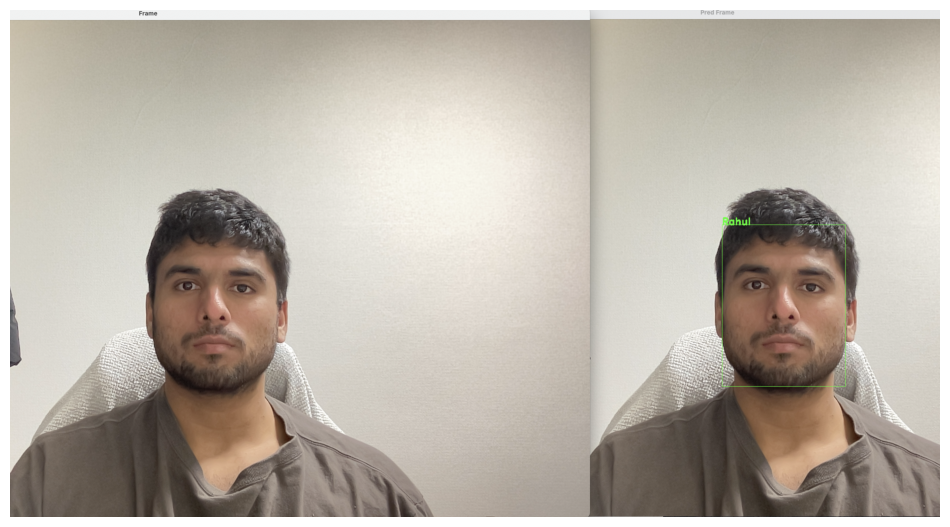

In [14]:
test_image = cv2.imread('/Users/boss/Desktop/Screenshot 2023-11-13 at 19.05.53.png')

# Convert from BGR to RGB color space
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Normalize pixel values to the range [0, 1]
test_image_normalized = test_image_rgb / 255.0
plt.figure(figsize=(12, 16))
plt.imshow(test_image_normalized)
plt.axis('off')  
plt.show()

*The Left Side is Normal Frame and The Right Side is applied Facial Recognition Frame(Real Time)*